In [1]:
import numpy as np
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
data_table_in = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')

In [4]:
data_table_in.head(10)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79104,6653.805970,5374.149254
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13725,5834.745098,4761.411765
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09375,8031.125000,5858.500000
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39259,6113.385185,5228.400000
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38235,5541.058824,4386.941176


In [5]:
data_table_out = pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [6]:
data_table_out.shape

(43372, 11)

In [7]:
data_table_out.head(25)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091
5,0012 - Level I Debridement & Destruction,40016,UAMS MEDICAL CENTER,4301 WEST MARKHAM STREET MAIL SLOT 612,LITTLE ROCK,AR,72205,AR - Little Rock,3166,58.954668,13.573774
6,0012 - Level I Debridement & Destruction,40017,NORTH ARKANSAS REGIONAL MEDICAL CENTER,620 NORTH MAIN STREET,HARRISON,AR,72601,AR - Springdale,438,143.639406,28.401027
7,0012 - Level I Debridement & Destruction,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,3333 SPRINGHILL DRIVE,NORTH LITTLE RO,AR,72117,AR - Little Rock,21,115.630952,18.256667
8,0012 - Level I Debridement & Destruction,40055,SPARKS REGIONAL MEDICAL CENTER,1001 TOWSON AVENUE,FORT SMITH,AR,72901,AR - Fort Smith,41,80.102439,13.172683
9,0012 - Level I Debridement & Destruction,40118,NEA BAPTIST MEMORIAL HOSPITAL,3024 STADIUM BOULEVARD,JONESBORO,AR,72401,AR - Jonesboro,12,16.993333,12.646667


In [23]:
data_by_apc = data_table_out.groupby(['APC'])['Average  Estimated Submitted Charges'].agg(['sum', 'count', 'mean', 'std'])

In [24]:
data_by_apc['cof of var'] = data_by_apc['std']/data_by_apc['mean']

In [27]:
top_3_by_variation = data_by_apc.sort_values(by='cof of var', ascending=False).head(3)

In [31]:
top_3_by_variation.index

Index(['0604 - Level 1 Hospital Clinic Visits',
       '0698 - Level II Eye Tests & Treatments',
       '0019 - Level I Excision/ Biopsy'],
      dtype='object', name='APC')

In [45]:
proc_1 = data_table_out[data_table_out['APC']=='0604 - Level 1 Hospital Clinic Visits']['Average  Estimated Submitted Charges'].values
proc_2 = data_table_out[data_table_out['APC']=='0698 - Level II Eye Tests & Treatments']['Average  Estimated Submitted Charges'].values
proc_3 = data_table_out[data_table_out['APC']=='0019 - Level I Excision/ Biopsy']['Average  Estimated Submitted Charges'].values


## combine these different collections into a list    
data_to_plot = [proc_1, proc_2, proc_3]

In [34]:
import matplotlib.pyplot as plt

%matplotlib inline

In [88]:


data_table_out[data_table_out['APC']=='0019 - Level I Excision/ Biopsy'].sort_values('Average  Estimated Submitted Charges', ascending=False)['Provider Name']




3336                   CENTINELA HOSPITAL MEDICAL CENTER
3335                    WHITTIER HOSPITAL MEDICAL CENTER
3521                NATCHEZ COMMUNITY HOSPITAL/SWING BED
3681                           CAROLINAS HOSPITAL SYSTEM
3717             BON SECOURS - MEMORIAL REGIONAL MEDICAL
3677              CAROLINA PINES REGIONAL MEDICAL CENTER
3311                            CRESTWOOD MEDICAL CENTER
3678                                 ST FRANCIS-DOWNTOWN
3306                                    FLOWERS HOSPITAL
3360                           BRANDON REGIONAL HOSPITAL
3305                   RIVERVIEW REGIONAL MEDICAL CENTER
3426                     OUR LADY OF BELLEFONTE HOSPITAL
3324                          SAINT AGNES MEDICAL CENTER
3712                 BON SECOURS MARYVIEW MEDICAL CENTER
3346                                      ORLANDO HEALTH
3518                               WESLEY MEDICAL CENTER
3322                                    ST ROSE HOSPITAL
3704                MEMORIAL HE

Text(26466.645, 3, 'CENTINELA HOSPITAL MEDICAL CENTER')

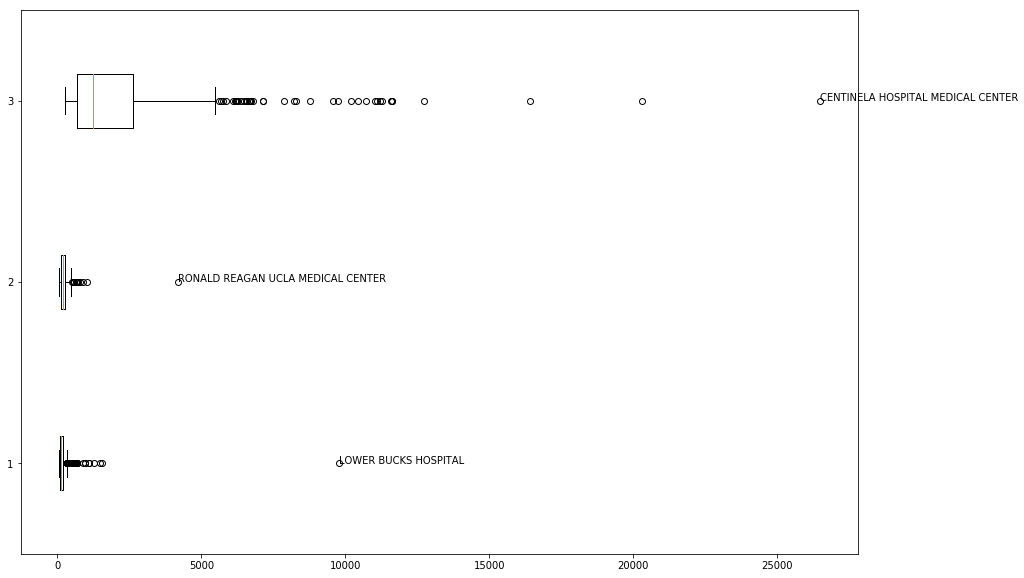

In [86]:
fig = plt.figure(1, figsize=(15, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,vert=False)

ax.annotate('LOWER BUCKS HOSPITAL', xy=(proc_1.max(),1))
ax.annotate('RONALD REAGAN UCLA MEDICAL CENTER', xy=(proc_2.max(),2))
ax.annotate('CENTINELA HOSPITAL MEDICAL CENTER', xy=(proc_3.max(),3))

In [60]:
res  = {}
for key, value in bp.items():
    res[key] = [v.get_data() for v in value]

Text(100, 1, 'test')

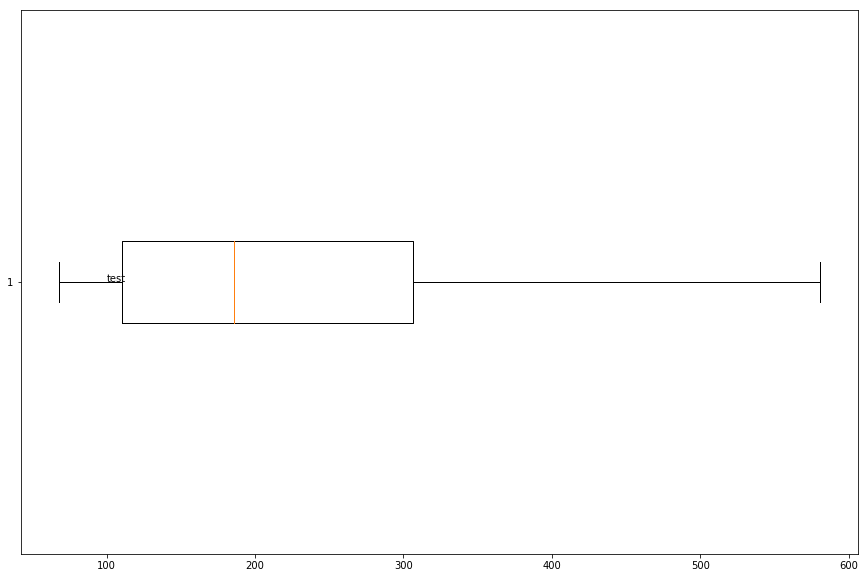

In [71]:
fig = plt.figure(1, figsize=(15, 10))

# Create an axes instance
ax1 = fig.add_subplot(111)

# Create the boxplot
bp1 = ax1.boxplot(proc_1[2:20],vert=False)

ax1.annotate('test', xy=(100,1))

In [66]:
res  = {}
for key, value in bp1.items():
    res[key] = [v.get_data() for v in value]

In [67]:
res

{'whiskers': [(array([110.65263095,  67.6955684 ]), array([1., 1.])),
  (array([306.6177132, 580.3233333]), array([1., 1.]))],
 'caps': [(array([67.6955684, 67.6955684]), array([0.9625, 1.0375])),
  (array([580.3233333, 580.3233333]), array([0.9625, 1.0375]))],
 'boxes': [(array([110.65263095, 110.65263095, 306.6177132 , 306.6177132 ,
          110.65263095]), array([0.925, 1.075, 1.075, 0.925, 0.925]))],
 'medians': [(array([185.8192485, 185.8192485]), array([0.925, 1.075]))],
 'fliers': [(array([], dtype=float64), array([], dtype=float64))],
 'means': []}